In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
dir = os.listdir("C:/Users/Administrator/Desktop/Brain_Tumor_Dataset/")
classes = {"no_tumor":0, "pituitary_tumor":1}

In [3]:
import cv2
X = []
Y = []
for c in classes:
    path = "C:/Users/Administrator/Desktop/Brain_Tumor_Dataset/Training/"+c
    for x in os.listdir(path):
        img = cv2.imread(path+"/"+x, 0)
        img = cv2.resize(img, (300,300))
        img = cv2.blur(img,(3,3))
        X.append(img)
        Y.append(classes[c])

In [4]:
X = np.array(X)
Y = np.array(Y)
X_reshaped = X.reshape(len(X), -1)
print(X.shape, X_reshaped.shape, np.unique(Y))

(1222, 300, 300) (1222, 90000) [0 1]


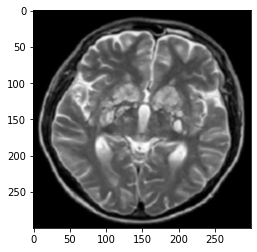

In [5]:
plt.imshow(X[101], cmap = "gray")

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X_reshaped, Y, random_state = 1, test_size = 0.2)

In [8]:
X_train.shape

(977, 90000)

In [9]:
X_test.shape

(245, 90000)

In [10]:
#normalizing
X_train = X_train/255
X_test = X_test/255

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
import warnings
warnings.filterwarnings("ignore")

In [13]:
lg = LogisticRegression(C=0.1)
lg.fit(X_train, Y_train)

LogisticRegression(C=0.1)

In [14]:
print("train score", lg.score(X_train, Y_train))
print("test score", lg.score(X_test, Y_test))

train score 1.0
test score 0.9714285714285714


In [15]:
#testing on test dataset
res = {0: "No Tumor", 1: "Pituitary Tumor"}
for i in range(1, 104):
    img = cv2.imread("C:/Users/Administrator/Desktop/Brain_Tumor_Dataset/Testing/no_tumor/image("+str(i)+").jpg",0)
    img = cv2.resize(img, (300,300))
    img = img.reshape(1,-1)/255
    prediction = lg.predict(img)
    print(res[prediction[0]], i)
    

No Tumor 1
No Tumor 2
No Tumor 3
No Tumor 4
No Tumor 5
No Tumor 6
No Tumor 7
No Tumor 8
No Tumor 9
No Tumor 10
No Tumor 11
No Tumor 12
No Tumor 13
No Tumor 14
No Tumor 15
No Tumor 16
No Tumor 17
No Tumor 18
No Tumor 19
No Tumor 20
No Tumor 21
No Tumor 22
No Tumor 23
No Tumor 24
No Tumor 25
No Tumor 26
No Tumor 27
No Tumor 28
No Tumor 29
No Tumor 30
No Tumor 31
No Tumor 32
No Tumor 33
No Tumor 34
No Tumor 35
No Tumor 36
No Tumor 37
No Tumor 38
No Tumor 39
No Tumor 40
No Tumor 41
No Tumor 42
No Tumor 43
No Tumor 44
No Tumor 45
No Tumor 46
No Tumor 47
No Tumor 48
No Tumor 49
No Tumor 50
No Tumor 51
No Tumor 52
No Tumor 53
No Tumor 54
No Tumor 55
No Tumor 56
No Tumor 57
No Tumor 58
No Tumor 59
No Tumor 60
No Tumor 61
No Tumor 62
No Tumor 63
No Tumor 64
No Tumor 65
No Tumor 66
No Tumor 67
No Tumor 68
No Tumor 69
No Tumor 70
No Tumor 71
No Tumor 72
No Tumor 73
No Tumor 74
No Tumor 75
No Tumor 76
No Tumor 77
No Tumor 78
No Tumor 79
No Tumor 80
No Tumor 81
No Tumor 82
Pituitary Tumor 83
No Tum

In [16]:
for i in range(1, 75):
    img = cv2.imread("C:/Users/Administrator/Desktop/Brain_Tumor_Dataset/Testing/pituitary_tumor/image ("+str(i)+").jpg",0)
    img = cv2.resize(img, (300,300))
    img = img.reshape(1,-1)/255
    prediction = lg.predict(img)
    print(res[prediction[0]], i)

Pituitary Tumor 1
Pituitary Tumor 2
Pituitary Tumor 3
Pituitary Tumor 4
Pituitary Tumor 5
Pituitary Tumor 6
Pituitary Tumor 7
No Tumor 8
Pituitary Tumor 9
No Tumor 10
Pituitary Tumor 11
Pituitary Tumor 12
Pituitary Tumor 13
Pituitary Tumor 14
Pituitary Tumor 15
Pituitary Tumor 16
Pituitary Tumor 17
Pituitary Tumor 18
Pituitary Tumor 19
Pituitary Tumor 20
Pituitary Tumor 21
Pituitary Tumor 22
Pituitary Tumor 23
No Tumor 24
Pituitary Tumor 25
Pituitary Tumor 26
Pituitary Tumor 27
Pituitary Tumor 28
Pituitary Tumor 29
Pituitary Tumor 30
Pituitary Tumor 31
Pituitary Tumor 32
Pituitary Tumor 33
No Tumor 34
No Tumor 35
Pituitary Tumor 36
Pituitary Tumor 37
Pituitary Tumor 38
Pituitary Tumor 39
Pituitary Tumor 40
Pituitary Tumor 41
Pituitary Tumor 42
No Tumor 43
No Tumor 44
No Tumor 45
No Tumor 46
No Tumor 47
No Tumor 48
Pituitary Tumor 49
Pituitary Tumor 50
Pituitary Tumor 51
Pituitary Tumor 52
Pituitary Tumor 53
Pituitary Tumor 54
No Tumor 55
No Tumor 56
No Tumor 57
Pituitary Tumor 58
Pitui

In [17]:
from sklearn.svm import SVC

In [18]:
sv = SVC()
sv.fit(X_train, Y_train)

SVC()

In [19]:
print("train score", sv.score(X_train, Y_train))
print("test score", sv.score(X_test, Y_test))

train score 0.9938587512794268
test score 0.9755102040816327


In [20]:
res = {0: "No Tumor", 1: "Pituitary Tumor"}
for i in range(1, 104):
    img = cv2.imread("C:/Users/Administrator/Desktop/Brain_Tumor_Dataset/Testing/no_tumor/image("+str(i)+").jpg",0)
    img = cv2.resize(img, (300,300))
    img = img.reshape(1,-1)/255
    prediction = sv.predict(img)
    print(res[prediction[0]], i)

No Tumor 1
No Tumor 2
No Tumor 3
No Tumor 4
No Tumor 5
No Tumor 6
No Tumor 7
No Tumor 8
No Tumor 9
No Tumor 10
No Tumor 11
No Tumor 12
No Tumor 13
No Tumor 14
No Tumor 15
No Tumor 16
No Tumor 17
No Tumor 18
No Tumor 19
No Tumor 20
No Tumor 21
No Tumor 22
No Tumor 23
No Tumor 24
No Tumor 25
No Tumor 26
No Tumor 27
No Tumor 28
No Tumor 29
No Tumor 30
No Tumor 31
No Tumor 32
No Tumor 33
No Tumor 34
No Tumor 35
No Tumor 36
No Tumor 37
No Tumor 38
No Tumor 39
No Tumor 40
No Tumor 41
No Tumor 42
No Tumor 43
No Tumor 44
No Tumor 45
No Tumor 46
No Tumor 47
No Tumor 48
No Tumor 49
No Tumor 50
No Tumor 51
No Tumor 52
No Tumor 53
No Tumor 54
No Tumor 55
No Tumor 56
No Tumor 57
No Tumor 58
No Tumor 59
No Tumor 60
No Tumor 61
No Tumor 62
No Tumor 63
No Tumor 64
No Tumor 65
No Tumor 66
No Tumor 67
No Tumor 68
No Tumor 69
No Tumor 70
No Tumor 71
No Tumor 72
No Tumor 73
No Tumor 74
No Tumor 75
No Tumor 76
No Tumor 77
No Tumor 78
No Tumor 79
No Tumor 80
No Tumor 81
No Tumor 82
No Tumor 83
No Tumor 84
N

In [21]:
for i in range(1, 74):
    img = cv2.imread("C:/Users/Administrator/Desktop/Brain_Tumor_Dataset/Testing/pituitary_tumor/image ("+str(i)+").jpg",0)
    img = cv2.resize(img, (300,300))
    img = img.reshape(1,-1)/255
    prediction = sv.predict(img)
    print(res[prediction[0]], i)

Pituitary Tumor 1
Pituitary Tumor 2
Pituitary Tumor 3
Pituitary Tumor 4
Pituitary Tumor 5
No Tumor 6
Pituitary Tumor 7
No Tumor 8
Pituitary Tumor 9
Pituitary Tumor 10
Pituitary Tumor 11
Pituitary Tumor 12
Pituitary Tumor 13
Pituitary Tumor 14
Pituitary Tumor 15
No Tumor 16
No Tumor 17
Pituitary Tumor 18
Pituitary Tumor 19
Pituitary Tumor 20
Pituitary Tumor 21
Pituitary Tumor 22
Pituitary Tumor 23
No Tumor 24
No Tumor 25
No Tumor 26
No Tumor 27
No Tumor 28
No Tumor 29
No Tumor 30
No Tumor 31
No Tumor 32
No Tumor 33
No Tumor 34
No Tumor 35
No Tumor 36
No Tumor 37
No Tumor 38
Pituitary Tumor 39
Pituitary Tumor 40
No Tumor 41
No Tumor 42
No Tumor 43
No Tumor 44
No Tumor 45
No Tumor 46
Pituitary Tumor 47
Pituitary Tumor 48
No Tumor 49
No Tumor 50
Pituitary Tumor 51
No Tumor 52
No Tumor 53
No Tumor 54
No Tumor 55
No Tumor 56
No Tumor 57
Pituitary Tumor 58
Pituitary Tumor 59
Pituitary Tumor 60
Pituitary Tumor 61
Pituitary Tumor 62
Pituitary Tumor 63
Pituitary Tumor 64
Pituitary Tumor 65
Pitui